In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [69]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset and EDA

In [59]:
loan_approval_dataset_df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv', skipinitialspace=True)
print(f"entries for the dataset {loan_approval_dataset_df.shape[0]} with {loan_approval_dataset_df.shape[1]} features")

entries for the dataset 4269 with 13 features


In [60]:
loan_approval_dataset_df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [61]:
loan_approval_dataset_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Initial points from manual observation:
1. load id is not significant we can remove this feature
2. some of the feature column can be converted to categorical - education, self_employed, loan_status (label encoder can be used)
3. from descriptive info nothing seems too off, need to check for missing values if any

In [62]:
# drop the load id column
loan_approval_dataset_df.drop("loan_id", inplace=True, axis='columns')
# lets first convert the required feature columns to categorical
label_encoder = LabelEncoder()
categorical_columns = ['education', 'self_employed', 'loan_status']
loan_approval_dataset_df[categorical_columns] = loan_approval_dataset_df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

In [63]:
loan_approval_dataset_df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [64]:
# check for any missing values
loan_approval_dataset_df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

class distribution percentage loan_status
0    62.215976
1    37.784024
Name: proportion, dtype: float64


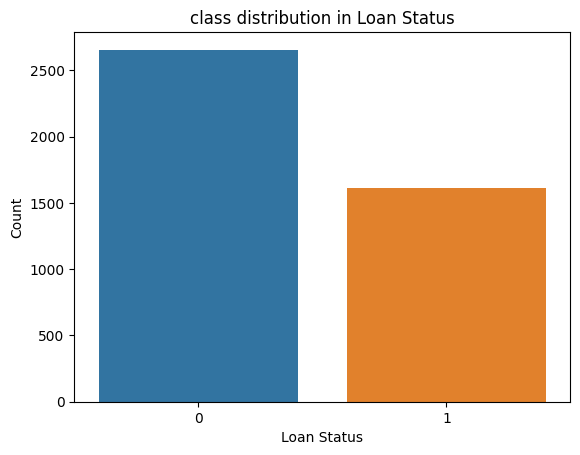

In [71]:
# lets check for class imbalance, if any we will be required to handle it later
class_distribution_per = loan_approval_dataset_df['loan_status'].value_counts(normalize=True) * 100
print(f"class distribution percentage {class_distribution_per}")
sns.countplot(x='loan_status', data=loan_approval_dataset_df)
plt.title("class distribution in Loan Status")
plt.xlabel("Loan Status")
plt.ylabel('Count')
plt.show()